# Graphs

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('./outputs/')

## Training performance

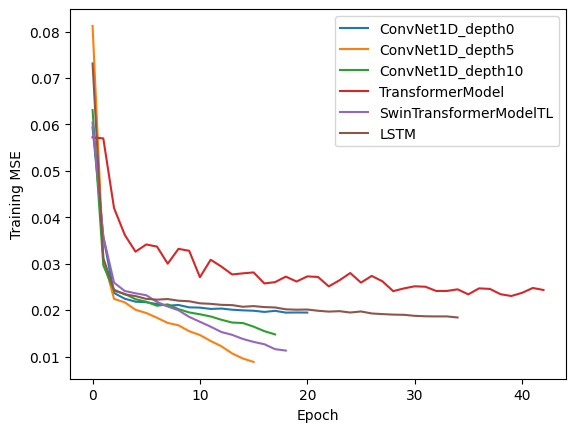

In [3]:
# Training performance
models = ['ConvNet1D', 'TransformerModel', 'SwinTransformerModelTL', 'LSTM']
conv_depths = [0, 5, 10]

for model in models:
  if model == 'ConvNet1D':
    for depth in conv_depths:
      file_names = [file_name for file_name in os.listdir() if file_name.startswith(f'{model}_depth{depth}')]
      outputs = [np.load(file_name) for file_name in file_names]
      min_val_maes = [np.min(output[2,:]) for output in outputs]
      best_seed_idx = np.argmin(min_val_maes)
      output = outputs[best_seed_idx]
      plt.plot(output[0,:], label = f'{model}_depth{depth}')

  else:
    file_names = [file_name for file_name in os.listdir() if file_name.startswith(model)]
    outputs = [np.load(file_name) for file_name in file_names]
    min_val_maes = [np.min(output[2,:]) for output in outputs]
    best_seed_idx = np.argmin(min_val_maes)
    output = outputs[best_seed_idx]
    plt.plot(output[0,:], label = model)

plt.xlabel('Epoch')
plt.ylabel('Training MSE')
plt.legend()
plt.show()

## Validation performance

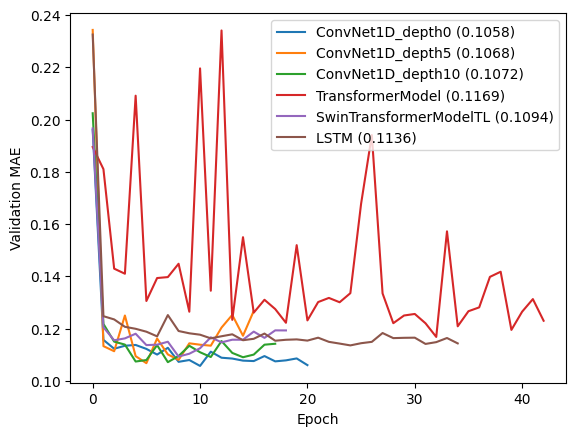

In [5]:
# Validation performance
models = ['ConvNet1D', 'TransformerModel', 'SwinTransformerModelTL', 'LSTM']
conv_depths = [0, 5, 10]

for model in models:
  if model == 'ConvNet1D':
    for depth in conv_depths:
      file_names = [file_name for file_name in os.listdir() if file_name.startswith(f'{model}_depth{depth}')]
      outputs = [np.load(file_name) for file_name in file_names]
      min_val_maes = [np.min(output[2,:]) for output in outputs]
      best_seed_idx = np.argmin(min_val_maes)
      output = outputs[best_seed_idx]
      plt.plot(output[2,:], label = f'{model}_depth{depth} ({min_val_maes[best_seed_idx]:.4f})')

  else:
    file_names = [file_name for file_name in os.listdir() if file_name.startswith(model)]
    outputs = [np.load(file_name) for file_name in file_names]
    min_val_maes = [np.min(output[2,:]) for output in outputs]
    best_seed_idx = np.argmin(min_val_maes)
    output = outputs[best_seed_idx]
    plt.plot(output[2,:], label = f'{model} ({min_val_maes[best_seed_idx]:.4f})')

plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()